#1. Write a function that list all the possible outcomes with five dice.
Here I decided to take a simple approach, that is, nesting 5 loops, each one giving a number for the dice.
In the first function, only the unique rolls are saved into the list, while in the second function every roll is saved.

In [33]:
#This function returns all possible unique outcomes, which means that 11116 and 11611 are the same outcome.
def five_dice_uniq():
    uniq_list = []
    for n in range(1,7):
        for u in range(1,7):
            for m in range(1,7):
                for b in range(1,7):
                    for e in range(1,7):
                        lista = [n,u,m,b,e]
                        lista.sort()
                        if lista not in uniq_list:
                            uniq_list.append(lista)
    return uniq_list

#This other function returns all possible outcomes, taking into account order of dice.        
def five_dice():
    uniq_list = []
    for n in range(1,7):
        for u in range(1,7):
            for m in range(1,7):
                for b in range(1,7):
                    for e in range(1,7):
                        uniq_list.append([n,u,m,b,e])
    return uniq_list

#2. Write a function that takes a number of dices and return all the possible outcomes for that amount of dices
This is a recursive function with basecase n=1 returning all the values in the dice and n=2 returning all combinations of these numbers. If n is greater than 2, it "builds" on the n=2 results, adding each one of the possible numbers.

In [31]:
def dados(n):
    if n==1:
        return (1,2,3,4,5,6)
    elif n==2:
        sol=[]
        for i in range (1,7):
            for j in range (1,7):
                sol.append((i,j))
        return sol
    else:
        vect=dados(n-1)
        sol=[]
        for i in vect:
            l=list(i)
            for j in range(1,7):
                l.append(j)
                t=tuple(l)
                sol.append(t)
                l=list(i)
        return sol

#3. Write functions that return, given five dice, ​ True​ or ​ False​ if we have Straight, Full, Poker or Generala.
This function takes each unique value of a roll and, depending on how many times each of these unique values appeared, assigns a tag (generala, straight, poker...). In some cases, like the pair, double pair, full and triple, it requires more than one piece of information to distinguish them.

In [34]:
def whatisit(n):
    uniq = set(n)
    freqs = []
    for roll in uniq:
        freqs.append(n.count(roll))
    if max(freqs) == 1:
        return "Straight"
    elif max(freqs) == 5:
        return "Generala"
    elif max(freqs) == 4:
        return "Poker"
    elif max(freqs) == 3:
        if len(freqs) == 2:
            return "Full"
        else:
            return "Triple"
    else:
        if len(freqs) == 3:
            return "Double pair"
        else:
            return "Pair"

#4. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands ​ served ​ .
This piece of code uses the previous function for all rolls with five dices and the "translator" from dice to served hand. After translating every possible roll, it computes the relative frequencies of every served hand, which are stored in 'dictionary'.

In [17]:
dictionary = {}
total = 0
for elem in five_dice():
    dictionary.setdefault(whatisit(elem),0) 
    dictionary[whatisit(elem)] += 1
    total += 1
for key in dictionary.keys():
    dictionary[key] = dictionary[key]/total
print(dictionary)

{'Generala': 0.023809523809523808, 'Straight': 0.023809523809523808, 'Full': 0.11904761904761904, 'Doble pareja': 0.23809523809523808, 'Triple': 0.23809523809523808, 'Poker': 0.11904761904761904, 'Pareja': 0.23809523809523808}


In [35]:
#5. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands.
lista = []
for throw in five_dice_uniq():
    lista.append(whatisit(throw))
manos = []
for elem in lista:
    for elem2 in lista:
        for elem3 in lista:
            manos.append([elem, elem2, elem3])
        
print(manos)

#6. Write a function that simulate a roll with n fair dices.
This function takes advantage of 'randint' from the module 'random' to generate random numbers with uniform distribution from 1 to 6. This is implemented into a for loop that is repeated n times, being n the number of times, while also appending the resulting values to the list 'dice'.

In [2]:
from random import randint
def roll(n):
    dados = []
    for i in range(n):
        dice.append(randint(1,6))
    return dice

[5, 5, 2, 3, 1]


#7. Write a function that plays automatically, always looking for a Generala with a greedy strategy (always keeping the most dices of the same kind and rolling the others) that returns ​ True​ if we get a Generala and a ​ False​ otherwise. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

This function works in the following fashion:
It counts the number of actual throws. If it is less than 3, it makes a roll.
The roll takes into account if the set of dices has already been rolled and some of the previous dice where equal. It completes the set of five dice by rolling those which were not kept.

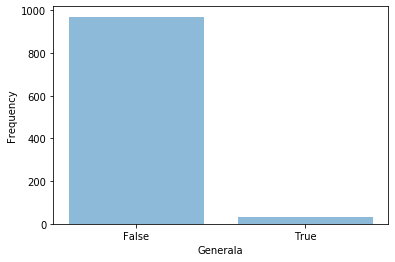

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
def generala(dice = [], present_roll = 0):
    if present_roll < 3:
        tirada = present_roll + 1
        for i in range(5-len(dice)):
            dice.append(randint(1,6))
        if len(set(dice)) == 1:
            return True
        max = 0
        for num in set(dice):
            if max < dice.count(num):
                max = dice.count(num)
                max_num = num
        kept_dice = [int(i) for i in max*str(max_num)]
        return generala(kept_dice,tirada)
    else:
        return False

    #Plotting
results = []
for i in range(1000):
    results.append(generala())
freqs = [results.count(False), results.count(True)]
langs = ("False", "True")
y_pos = np.arange(len(langs))
plt.bar(y_pos, freqs, align='center', alpha=0.5)
plt.xticks(y_pos, langs)
plt.ylabel("Frequency")
plt.xlabel("Generala")

plt.show()

This function follows a binomial distribution. This is because there are two possible outcomes: getting a Generala or not getting it. Also, we have a probability of getting the generala and 1-(this probability) would be the unsuccessful case.

#8. Write a function that plays until it gets a Generala, count how many times it had to play to get it and return this number. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

This function works by using the previous function and registering the number of times it has to be called until generala is True.

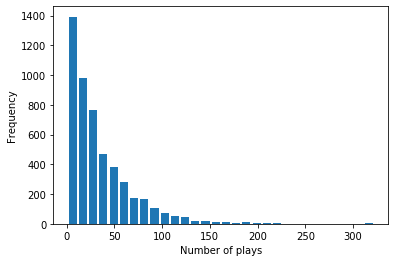

In [14]:
def generala_num(play = 0):
    play += 1
    if generala():
        return play
    else:
        return generala_num(play)
generala_num()

    #Plotting
results = []
for num in range(5000):
    results.append(generala_num())
bins=30
plt.hist(results, bins, histtype='bar', rwidth=0.8)
plt.ylabel("Frequency")
plt.xlabel("Number of plays")
plt.show()


This function follows a geometric distribution. The geometric distribution is the probability distribution of the number of Bernouilli trials needed to get one success. Each trial is independent of the others. There are only two possible outcomes for each trial. The probability of succes is the same for every trial. In this case the success is getting a generala.